#Deep Learning Bootcamp - Assignment 2 - Beginners: Recognize an Animal in an Image

##Reading the training set

In [ ]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

Cloning into 'Datasets'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 9874 (delta 8), reused 17 (delta 2), pack-reused 9847
Receiving objects: 100% (9874/9874), 427.70 MiB | 32.52 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (9345/9345), done.


In [ ]:
!unzip animal_data/train_beg.zip#Unzipping the training set

Archive:  animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflating: train_beg/Ima

In [ ]:
# accessing the given csv file
import pandas as pd
labels_csv = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
labels_csv.head()   # this file contains file name and corresponding labels

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in labels_csv['filename']]
image_paths   

[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

In [ ]:
# Confirm if number of images is same as number of labels given
if len(labels_csv) == len(image_paths):
    print('Number of labels i.e. ', len(labels_csv), 'matches the number of filenames i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


In [ ]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'file']
images

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg
...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg


In [ ]:
train_data = pd.merge(images, labels_csv, how = 'inner', on = 'filename')
train_data

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca
...,...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg,pecora
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg,pecora
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg,pecora
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg,pecora


##Loading  image into numpy array

In [ ]:
import cv2#importing cv2 for imread()
import numpy as np

In [ ]:
data = []
for i in range(len(train_data)):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img_array = cv2.imread (train_data.file[i],1) 
  data.append([img_array,train_data.animal_type[i] ]) #  append the image array and the label of each file into data

In [ ]:
data[0][0]#Checking the image array

array([[[207, 205, 205],
        [207, 205, 205],
        [207, 205, 205],
        ...,
        [204, 203, 205],
        [204, 203, 205],
        [205, 204, 206]],

       [[205, 203, 203],
        [205, 203, 203],
        [206, 204, 204],
        ...,
        [203, 202, 204],
        [205, 204, 206],
        [206, 205, 207]],

       [[207, 205, 205],
        [206, 204, 204],
        [205, 203, 203],
        ...,
        [204, 203, 205],
        [206, 205, 207],
        [208, 207, 209]],

       ...,

       [[246, 252, 247],
        [245, 255, 251],
        [232, 253, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[241, 248, 243],
        [241, 255, 249],
        [230, 253, 249],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[243, 250, 245],
        [243, 255, 251],
        [232, 255, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

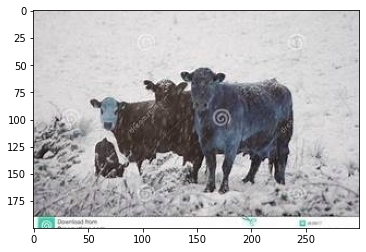

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0])#Looking at some random images 

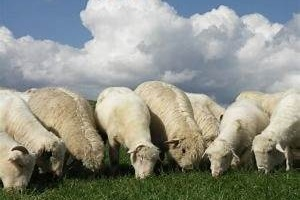

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(data[1195][0])
#cv2.waitKey(0)


In [ ]:
train_images = np.array([i[0] for i in data])#Creating the training set

In [ ]:
train_images.shape#Checking training set's shape 

(1200, 200, 300, 3)

In [ ]:
train_y = np.array([0 if i[1] == 'mucca' else 1 for i in data])#Encoding labels: 0 for Mucca and 1 for Pecora

In [ ]:
train_y[1195]

1

## Normalizing and reshaping image arrays

In [ ]:
train_images = train_images/255
train_images[0]#Normalizing image arrays 

array([[[0.81176471, 0.80392157, 0.80392157],
        [0.81176471, 0.80392157, 0.80392157],
        [0.81176471, 0.80392157, 0.80392157],
        ...,
        [0.8       , 0.79607843, 0.80392157],
        [0.8       , 0.79607843, 0.80392157],
        [0.80392157, 0.8       , 0.80784314]],

       [[0.80392157, 0.79607843, 0.79607843],
        [0.80392157, 0.79607843, 0.79607843],
        [0.80784314, 0.8       , 0.8       ],
        ...,
        [0.79607843, 0.79215686, 0.8       ],
        [0.80392157, 0.8       , 0.80784314],
        [0.80784314, 0.80392157, 0.81176471]],

       [[0.81176471, 0.80392157, 0.80392157],
        [0.80784314, 0.8       , 0.8       ],
        [0.80392157, 0.79607843, 0.79607843],
        ...,
        [0.8       , 0.79607843, 0.80392157],
        [0.80784314, 0.80392157, 0.81176471],
        [0.81568627, 0.81176471, 0.81960784]],

       ...,

       [[0.96470588, 0.98823529, 0.96862745],
        [0.96078431, 1.        , 0.98431373],
        [0.90980392, 0

In [ ]:
import cv2

def resize_image_array(img, img_size_dims):
    img = cv2.resize(img, dsize=img_size_dims, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

In [ ]:
IMG_DIMS = (224, 224)#Reshaping images to 224x224 

train_images_resized = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in train_images])


In [ ]:
train_images_resized[0]

array([[[0.8120495 , 0.8042064 , 0.8042064 ],
        [0.811975  , 0.80413187, 0.80413187],
        [0.81191534, 0.8040722 , 0.8040722 ],
        ...,
        [0.795779  , 0.7918574 , 0.79970056],
        [0.800016  , 0.7960944 , 0.80393755],
        [0.8032013 , 0.79927975, 0.8071229 ]],

       [[0.8043129 , 0.79646975, 0.79646975],
        [0.8067644 , 0.7989213 , 0.7989213 ],
        [0.80849904, 0.8006559 , 0.8006559 ],
        ...,
        [0.7917402 , 0.7878186 , 0.79566175],
        [0.79961103, 0.79568946, 0.8035326 ],
        [0.8062326 , 0.802311  , 0.81015414]],

       [[0.8107138 , 0.8028707 , 0.8028707 ],
        [0.80577624, 0.7979331 , 0.7979331 ],
        [0.8036196 , 0.7957765 , 0.7957765 ],
        ...,
        [0.79206485, 0.7881433 , 0.7959864 ],
        [0.8029015 , 0.79897994, 0.8068231 ],
        [0.8130572 , 0.8091356 , 0.81697875]],

       ...,

       [[0.95845646, 0.9858369 , 0.96638346],
        [0.937998  , 0.99660736, 0.9831512 ],
        [0.85953903, 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


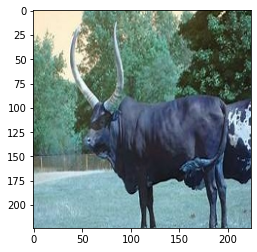

In [ ]:
plt.imshow(train_images_resized[65])

In [ ]:
train_images_resized.shape

(1200, 224, 224, 3)

##Model building using transfer learning

Using VGG-19 CNN and fine tuning

In [ ]:

# define input shape
INPUT_SHAPE = (224, 224, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:

# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f173ef35da0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f170043c518> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1700356518> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f170044ddd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f17002dee48> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f17002e14e0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f17002e1da0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f17002e4c50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f17002f66d8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f17002f6ba8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f170030b940> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1700311

##Model building

In [ ]:

# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

#Model training

In [ ]:
EPOCHS = 100

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(train_images_resized, train_y,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
34/34 [==============================] - 37s 1s/step - loss: 0.6283 - accuracy: 0.6444 - val_loss: 0.3178 - val_accuracy: 0.9417
Epoch 2/100
34/34 [==============================] - 31s 917ms/step - loss: 0.3842 - accuracy: 0.8380 - val_loss: 0.1935 - val_accuracy: 0.9500
Epoch 3/100
34/34 [==============================] - 31s 917ms/step - loss: 0.2227 - accuracy: 0.9037 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 4/100
34/34 [==============================] - 31s 919ms/step - loss: 0.1760 - accuracy: 0.9185 - val_loss: 0.0777 - val_accuracy: 0.9833
Epoch 5/100
34/34 [==============================] - 31s 919ms/step - loss: 0.0925 - accuracy: 0.9694 - val_loss: 0.3119 - val_accuracy: 0.8667
Epoch 6/100
34/34 [==============================] - 31s 918ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.2127 - val_accuracy: 0.9167
Epoch 00006: early stopping


##Visualizing accuracy and loss

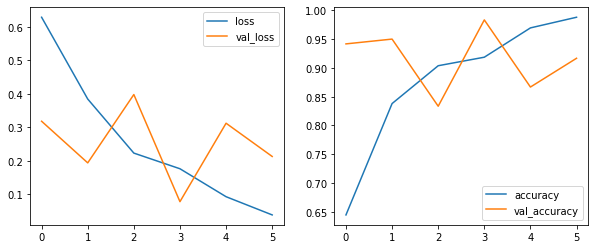

In [ ]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

#Making predictions

In [ ]:
!unzip animal_data/test_beg.zip#Unziping the test set

Archive:  animal_data/test_beg.zip
   creating: test_beg/
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg/Image_12.jpg   
  inflating: test_beg/Image_12

In [ ]:
labels_test = pd.read_csv('/content/animal_data/Testing_set_animals.csv')
labels_test.shape

(399, 1)

In [ ]:
#Loading test images into arrays
base_path = '/content/test_beg/Image_.jpg'
img = []
for i in range(1,401):
  path = '/content/test_beg/Image_'+str(i)+'.jpg'
  img.append(cv2.imread (path,1))

In [ ]:
test_images = np.array(img)
test_images.shape


(400, 200, 300, 3)

In [ ]:
#Resizing test images
test_images_resized = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in test_images])


In [ ]:
test_images_resized = test_images_resized/255

In [ ]:
#Generating predictions
y_pred = model.predict(test_images_resized)

In [ ]:
y_pred.shape

(400, 2)

In [ ]:
predictions = np.argmax(y_pred, axis=1)
predictions.shape

(400,)

In [ ]:
predictions[0]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
#Decoding labels for submission
final_pred = []
for i in predictions:
  if i==0:
    final_pred.append('mucca')
  else:
    final_pred.append('pecora')


In [ ]:
final_pred

['pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'mucc